In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from pickle import dump
from pickle import load

In [2]:
data=read_csv("diabetes.csv")

In [3]:
data.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().any()

preg     False
plas     False
pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [9]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
import seaborn as sns

<IPython.core.display.Javascript object>

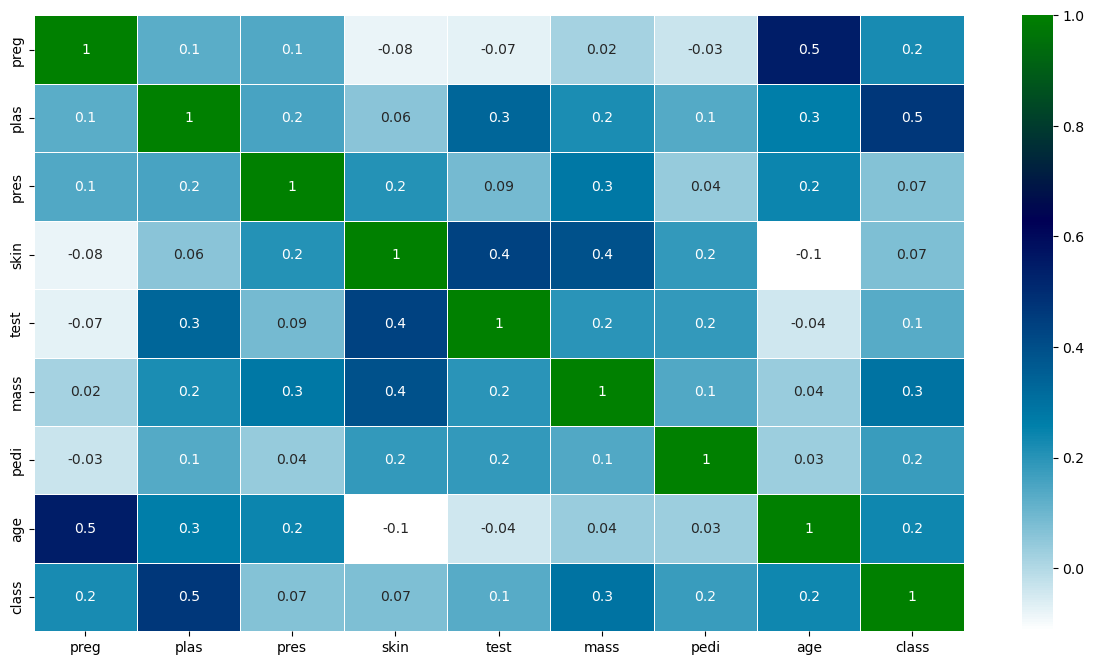

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap="ocean_r",linewidth=0.5);

In [12]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]


In [13]:
# PCA, KNN, Clustring 

"""

1,2,3,7


1--> (1-1)/(7-1) =0
2--> (2-1)/(7-1) =1/6
3--> (3-1)/(7-1) =2/6
7--> (7-1)/(7-1) =1


"""


'\n\n1,2,3,7\n\n\n1--> (1-1)/(7-1) =0\n2--> (2-1)/(7-1) =1/6\n3--> (3-1)/(7-1) =2/6\n7--> (7-1)/(7-1) =1\n\n\n'

In [14]:
scaler = MinMaxScaler()

scaler.fit(X)

X=scaler.transform(X)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

# chose the best value of k

In [16]:
"""

train and test

for k in range(1,40,2):

    KNN(k) ---> train
    evaluate on test 
    

best value of k or which we get the best score on test data


CV 

train-> t1,t2,t3,t4,t5

for k in range(1,40,2):
    model1-> (t1,t2,t3,t4) test-> t5 s1
    model2-> (t1,t2,t3,t5) test-> t4 s2
    model3-> (t1,t2,t4,t5) test-> t3 s3
    model4-> (t1,t3,t4,t5) test-> t2 s4
    model5-> (t2,t3,t4,t5) test-> t1 s5


    overall=(s1+s2+s3+S4+s5)/5

best value of k for which we get the best overall score 

"""

'\n\ntrain and test\n\nfor k in range(1,40,2):\n\n    KNN(k) ---> train\n    evaluate on test \n    \n\nbest value of k or which we get the best score on test data\n\n\nCV \n\ntrain-> t1,t2,t3,t4,t5\n\nfor k in range(1,40,2):\n    model1-> (t1,t2,t3,t4) test-> t5 s1\n    model2-> (t1,t2,t3,t5) test-> t4 s2\n    model3-> (t1,t2,t4,t5) test-> t3 s3\n    model4-> (t1,t3,t4,t5) test-> t2 s4\n    model5-> (t2,t3,t4,t5) test-> t1 s5\n\n\n    overall=(s1+s2+s3+S4+s5)/5\n\nbest value of k for which we get the best overall score \n\n'

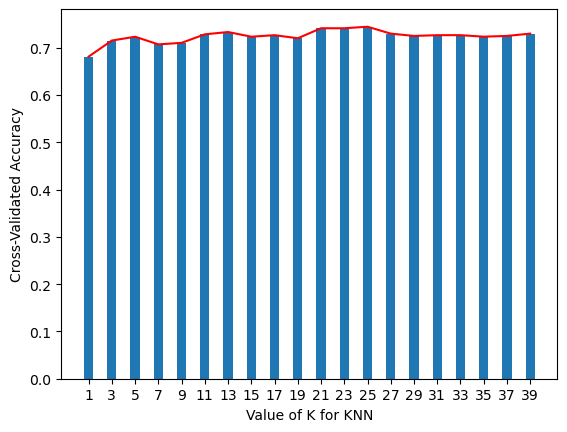

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
''' use iteration to caclulator different k in models,
then return the average accuracy based on the cross validation'''
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [18]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
12,25,0.744236
10,21,0.741010
11,23,0.741010
6,13,0.733025
13,27,0.729640
19,39,0.729640
5,11,0.728160
16,33,0.726388
8,17,0.726362
15,31,0.726362


# building our model

In [19]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.8051948051948052

## Cross validation

In [28]:
# for loop for best possible k values

scores=[]

for i in range(1,40,2):
    model=KNeighborsClassifier(i)
    score=cross_val_score(model,x_train,y_train,cv=5)
    scores.append(score.mean())

In [29]:
scores

[0.6921897907503667,
 0.7166333466613354,
 0.7280554444888712,
 0.7149806743969079,
 0.7198853791816606,
 0.7215113954418232,
 0.7198720511795281,
 0.7279888044782087,
 0.7198453951752632,
 0.7296148207383714,
 0.7377715580434492,
 0.732880181260829,
 0.7394109023057444,
 0.7247900839664134,
 0.7296281487405037,
 0.726389444222311,
 0.7231107556977209,
 0.7280154604824736,
 0.7280287884846062,
 0.7329201652672265]

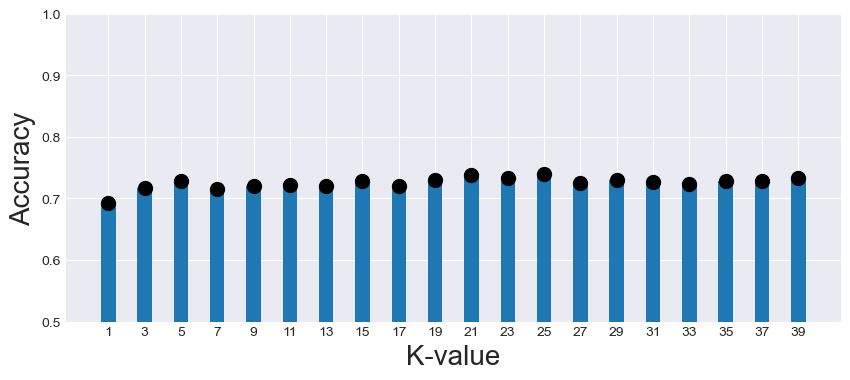

In [30]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.bar(range(1,40,2),scores)
plt.xticks(range(1,40,2))
plt.xlabel("K-value",size=20)
plt.ylabel("Accuracy",size=20)
plt.ylim(0.5,1)
plt.scatter(range(1,40,2),scores,s=100,color="Black")
plt.show()

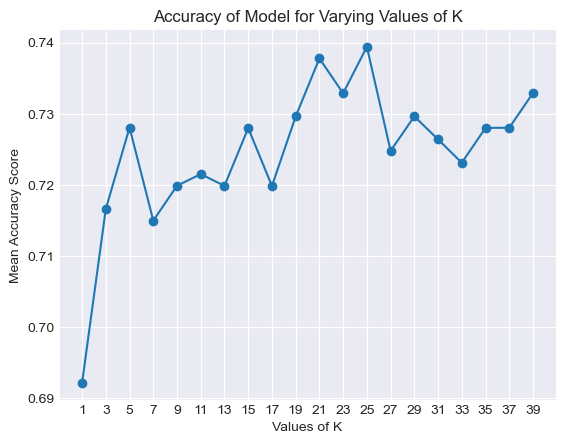

In [31]:
# plot for k value
plt.plot(range(1,40,2),scores, marker='o')
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(range(1,40,2))
plt.rcParams['figure.figsize'] = (5,5) 
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.8051948051948052

In [33]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
score=cross_val_score(knn,x_train,y_train)
score.mean()

0.7394109023057444

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        99
         1.0       0.84      0.56      0.67        55

    accuracy                           0.81       154
   macro avg       0.82      0.75      0.77       154
weighted avg       0.81      0.81      0.79       154



In [20]:
dump(knn, open('knn.sav', 'wb'))
dump(scaler, open('scaler.sav', 'wb'))

In [21]:
loaded_model = load(open('knn.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.7669270833333334


In [27]:
'''# Any model in sklearn the new data should be in array format
so we need to reshape the new upcoming data into array or table form.
'''

loaded_model.predict(np.reshape([1,2,3,4,5,6,7,8],(1,8)))

array([1.])

In [23]:
import numpy as np

In [24]:
l=[1,2,3,5,5]

np.array(l)

array([1, 2, 3, 5, 5])

In [25]:
np.array(l).reshape(1,-1).shape

(1, 5)

# deploy the model

In [ ]:
pip install streamlit

In [40]:
import sklearn

sklearn.__version__

'1.0.2'

In [41]:
import streamlit
streamlit.__version__

'1.21.0'

In [39]:
!streamlit run appupdated.py

^C


In [42]:
x=10
y=10

In [43]:
id(x)

1476433570384

In [44]:
id(y)

1476433570384